Group: Morten Kjelsrud, Ole Marcus Schøne Aarnes og Anders Vestrum

# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



Epoch 0, Loss: 4545.156773768433
Epoch 100, Loss: 83.83446011136888
Epoch 200, Loss: 5.368961467854448


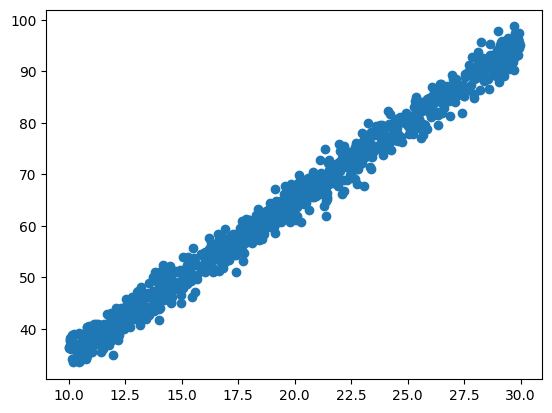

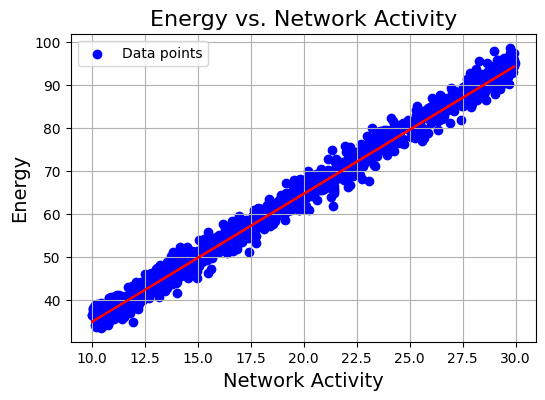

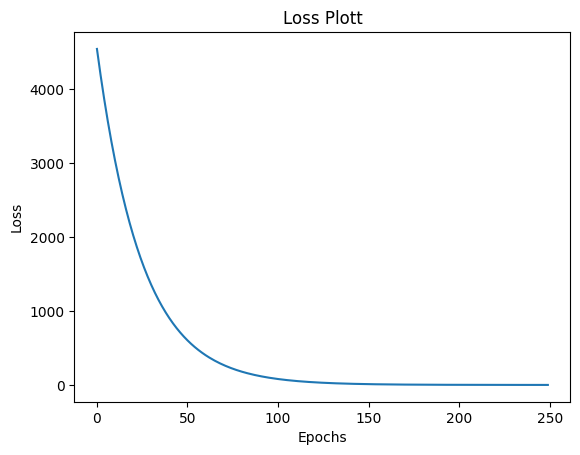

Slope (m): 2.989425861733721
Bias (b): 4.860373426970116
The derived function is: y = 2.99 * X + 4.86


In [5]:
# Data
data = pd.read_csv('mission1.csv')

X = data['Net_Activity'].values.reshape(-1, 1)
y = data['Energy'].values.flatten()

plt.scatter(X, y)

modelX = StandardScaler()
X_scaled = modelX.fit_transform(X)

lr = LinearRegression(learning_rate=0.01, epochs=250)

lr.fit(X_scaled, y)
predictions = lr.predict(X_scaled)

# Plot of data and regression line
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Network Activity', fontsize=16)
plt.legend()
plt.plot(X, predictions, c='red', label='Regression line')
plt.show()

# Plot of the loss
plt.plot(range(len(lr.losses)), lr.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plott')
plt.show()

# Derive the Energy-Consumption formula
xValues = X.flatten()
yValues = predictions

N = len(xValues)
sum_x = np.sum(xValues)
sum_y = np.sum(yValues)
sum_xy = np.sum(xValues * yValues)
sum_x_squared = np.sum(xValues ** 2)

# Calculate slope (m) and bias (b)
slope = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
bias = (sum_y - slope * sum_x) / N

print(f"Slope (m): {slope}")
print(f"Bias (b): {bias}")

# Derive the Energy-Consumption formula
print(f"The derived function is: y = {slope:.2f} * X + {bias:.2f}")

#### Discussion part Mission 1:
2b: can see that the loss decreases as the epochs increase. This is a sign of the model improve during training, by parameters being adjusted. An unbiased estimator is an estimator where the expected value is equal to the true value. In the calculation of slope and bias, we have used two unbiased estimators for each.




## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

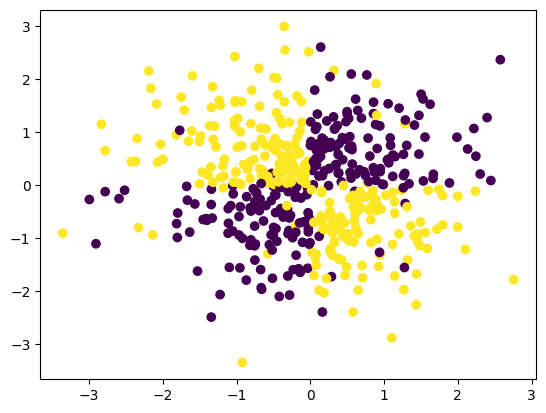

Epoch 0, Loss: 0.6931471805599454, Accuracy: 0.476
Epoch 25, Loss: 0.5252234273955553, Accuracy: 0.874
Epoch 50, Loss: 0.4904772133523378, Accuracy: 0.888
Epoch 75, Loss: 0.4752056939192883, Accuracy: 0.896
Epoch 100, Loss: 0.4667856816661889, Accuracy: 0.9
Epoch 125, Loss: 0.46158799886564644, Accuracy: 0.9
Epoch 150, Loss: 0.45815314990207306, Accuracy: 0.902
Epoch 175, Loss: 0.4557773454896042, Accuracy: 0.906
Epoch 200, Loss: 0.4540796104026909, Accuracy: 0.906
Epoch 225, Loss: 0.45283645854769844, Accuracy: 0.906
Epoch 250, Loss: 0.45190881495257146, Accuracy: 0.906
Epoch 275, Loss: 0.45120613909300794, Accuracy: 0.908
Epoch 300, Loss: 0.45066735750231346, Accuracy: 0.908
Epoch 325, Loss: 0.4502500799879242, Accuracy: 0.91
Epoch 350, Loss: 0.4499241877380643, Accuracy: 0.91
Epoch 375, Loss: 0.4496678608073101, Accuracy: 0.91
Epoch 400, Loss: 0.4494650308614592, Accuracy: 0.91
Epoch 425, Loss: 0.44930369957743943, Accuracy: 0.91
Epoch 450, Loss: 0.44917480048926106, Accuracy: 0.91


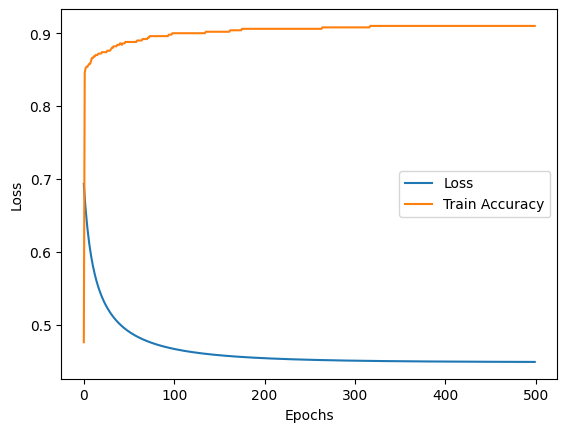

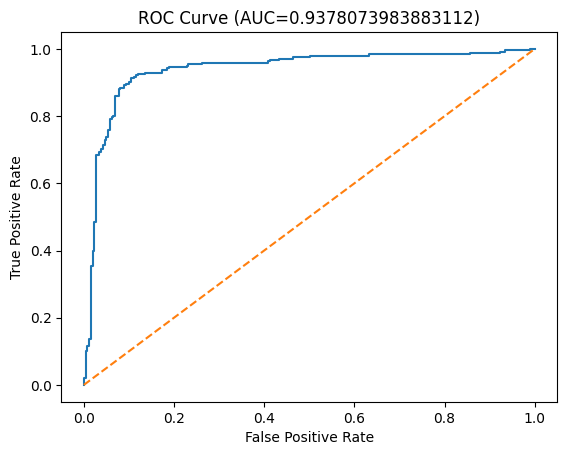

In [6]:
import logistic_regression as logreg
from sklearn.metrics import roc_curve, auc

data = pd.read_csv('mission2.csv')
train1 = data[data['split'] == 'train']
test = data[data['split'] == 'test']

plt.scatter(train1['x0'], train1['x1'], c=train1['y'])
plt.show()

y_train_data = train1['y']

X = np.array([train1['x0'], train1['x1'], train1['x0'] * train1['x1']]).T
X_test = np.array([test['x0'], test['x1'], test['x0'] * test['x1']]).T


logistic_regression = logreg.LogisticRegression(learning_rate=0.25, epochs=500)

logistic_regression.fit(X, y_train_data)
predictions = logistic_regression.predict(X_test)


# Plotting Loss/Accuracy curve
plt.plot(range(len(logistic_regression.losses)), logistic_regression.losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(len(logistic_regression.train_accuracy)), logistic_regression.train_accuracy, label='Train Accuracy')
plt.legend()
plt.show()


# ROC curve
prob_pred = logistic_regression.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(test['y'], prob_pred)
auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title(f'ROC Curve (AUC={auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()


#### Discussion Mission 2:
3a: The initial poor performance was caused by a not-linear relation between x0 and x1 to target y. By adding (x0 * x1) as a feature we can lineary divide y=0 and y=1.

3b: The inductive bias of the model is the assumption that the relation between features and target can be described by linearity. It is important for the model to focus on some certain patterns or hypothesises.

3c: Solved the task using DecisionTreeClassifier with depth=1. The split on x0*x1 feature splits the samples into predictions close to targets pretty well. (Implementation down below)

Accuracy of Decision Tree: 0.948
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       259
         1.0       0.94      0.95      0.95       241

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



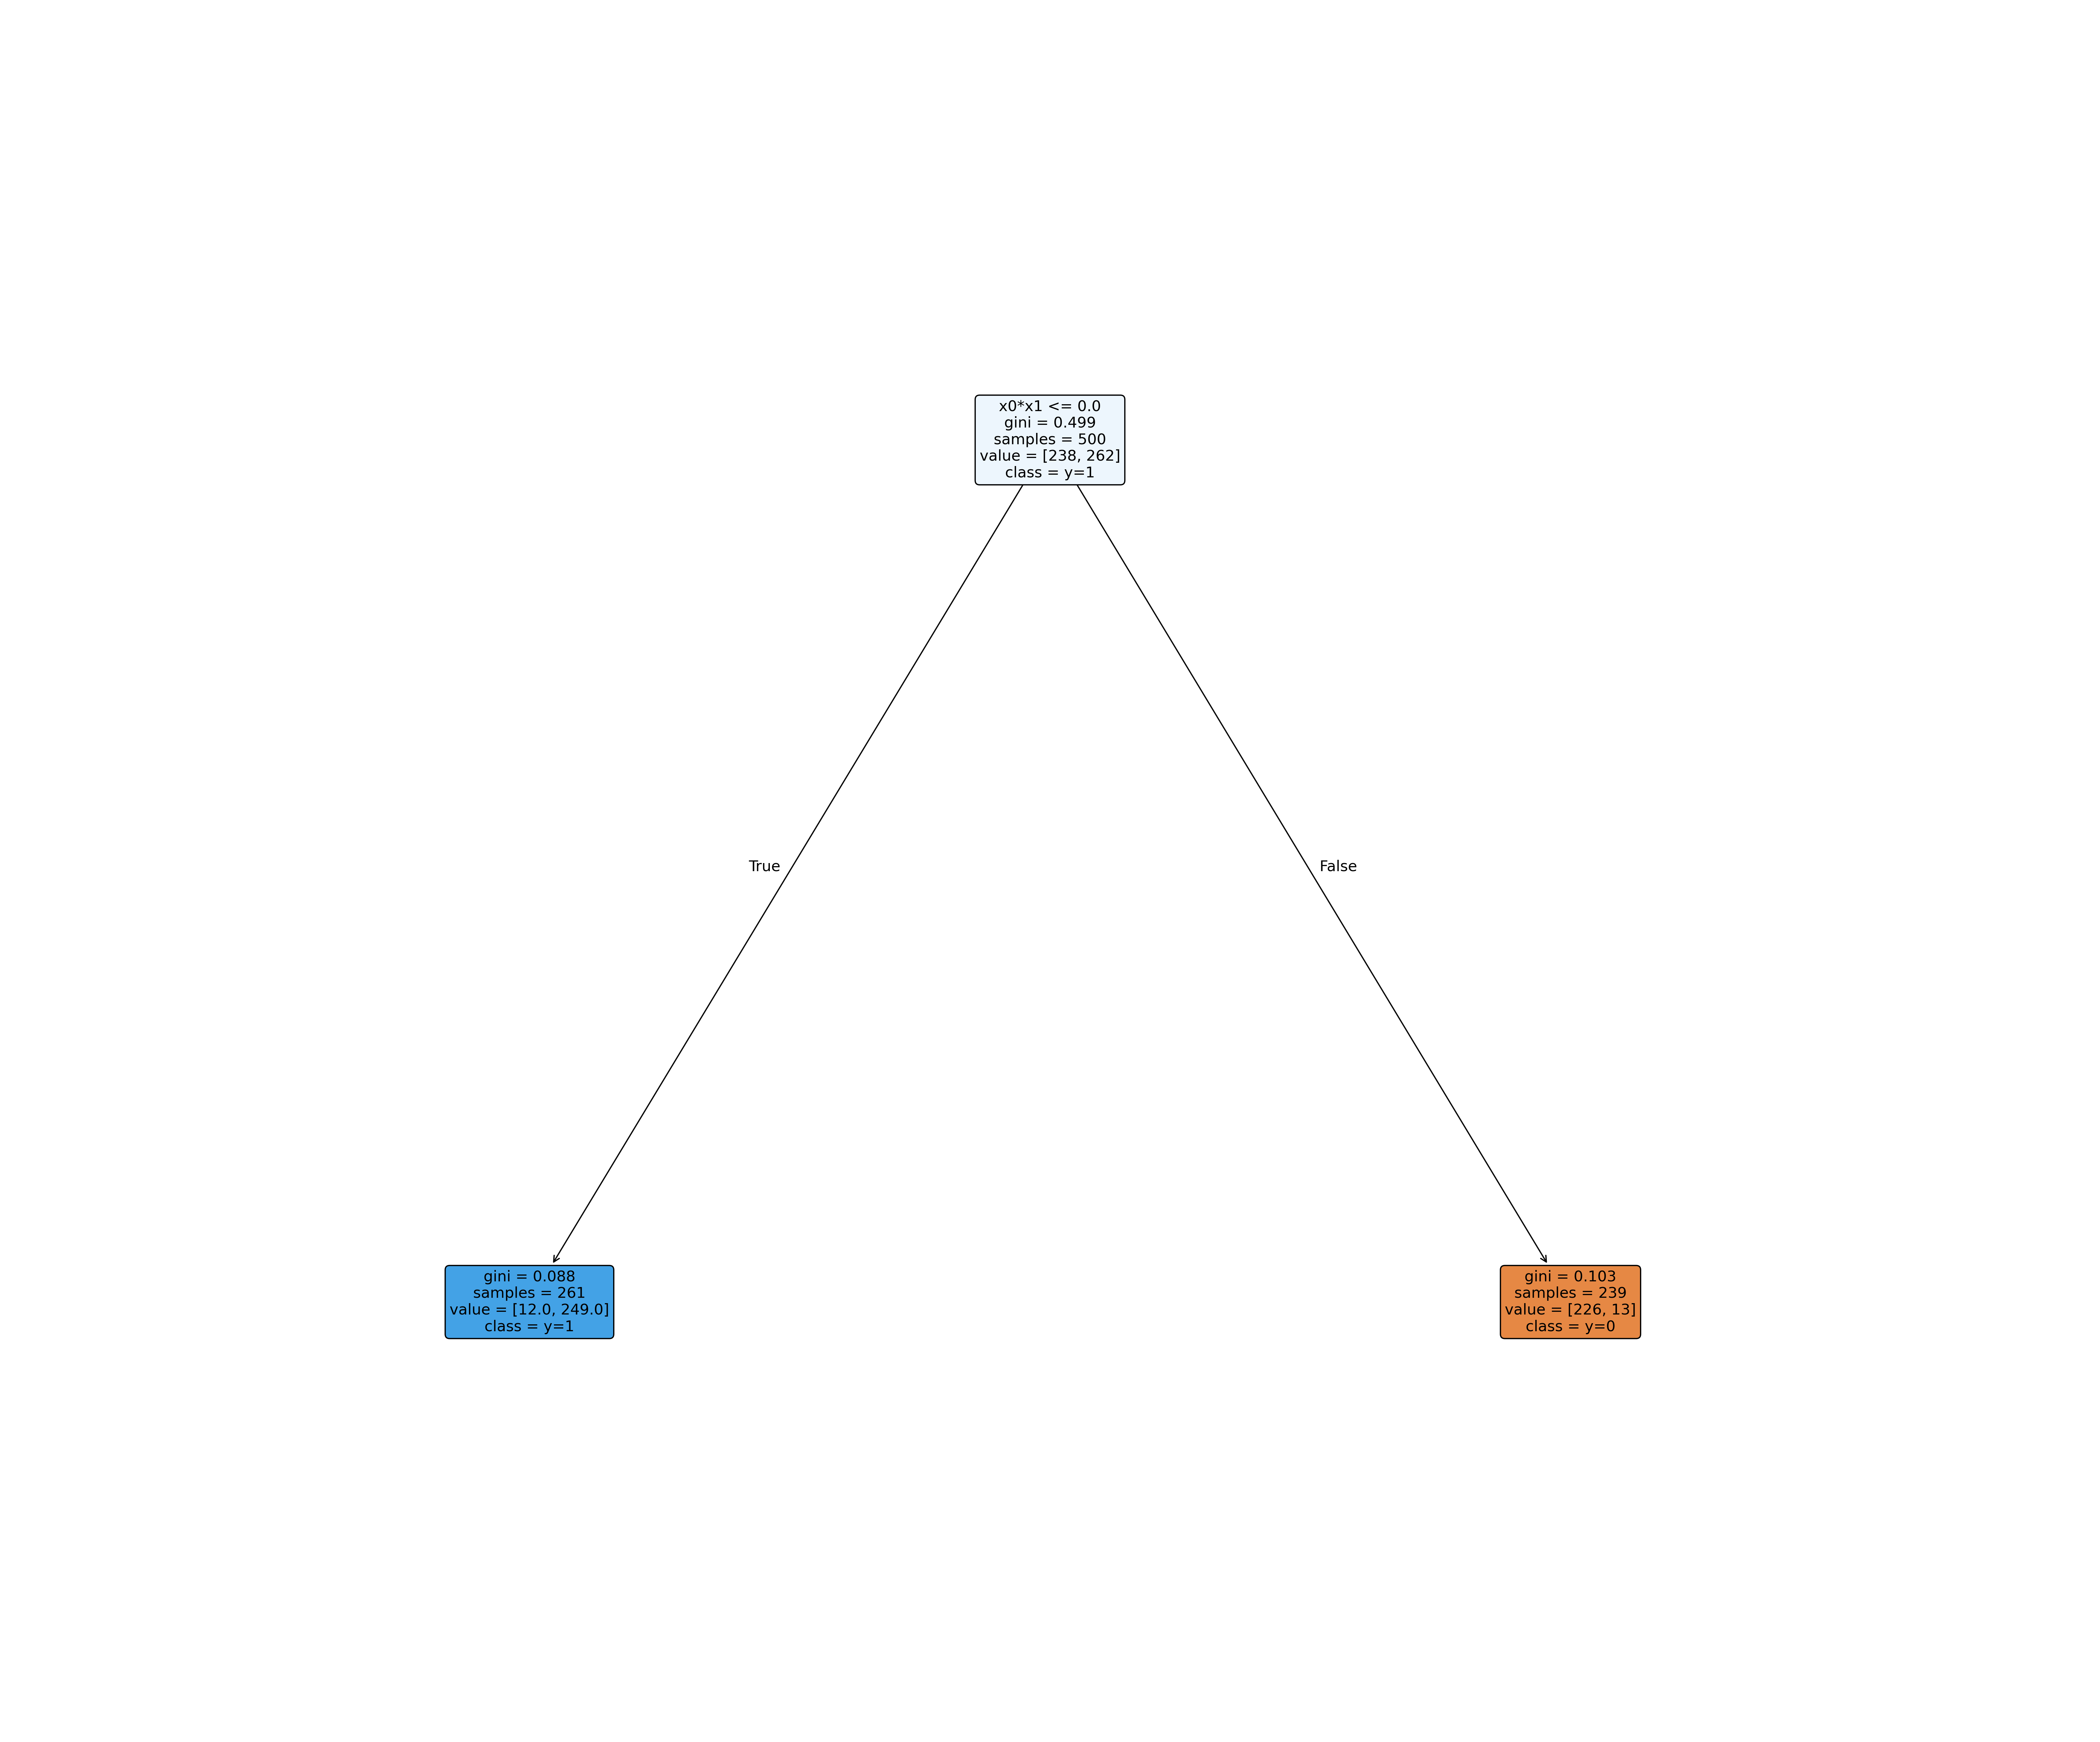

In [7]:
import sklearn
from sklearn.tree import *

clf = sklearn.tree.DecisionTreeClassifier(max_depth=1, criterion='gini')
clf.fit(X, y_train_data)

predY = clf.predict(X_test)

accuracyCLF = sklearn.metrics.accuracy_score(test['y'], predY)
print(f'Accuracy of Decision Tree: {accuracyCLF}')

print("Classification Report:")
print(classification_report(test['y'], predY))


# Increase the figure size and adjust the DPI for higher resolution
plt.figure(figsize=(30, 25), dpi=300)

# Plot the tree with more vertical and horizontal separation
plot_tree(clf, filled=True, fontsize=12, proportion=False, rounded=True, 
          feature_names=['x0', 'x1', 'x0*x1'],  # Replace with actual feature names
          class_names=['y=0', 'y=1'])  # Replace with actual class names


plt.savefig('tree.png')




## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

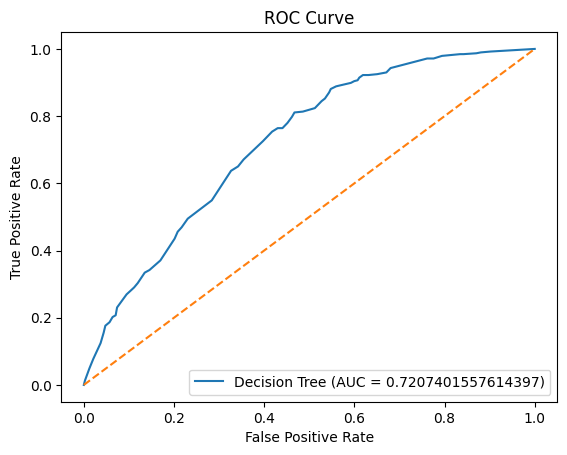

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1614
           1       0.30      0.75      0.43       386

    accuracy                           0.62      2000
   macro avg       0.60      0.67      0.57      2000
weighted avg       0.79      0.62      0.66      2000



In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split



train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')



#gjør noe med datastream3
train['data_stream_3'] = (train['data_stream_3']*1000) % 2
test['data_stream_3'] = (test['data_stream_3']*1000) % 2


data_stream_columns = [f'data_stream_{i}' for i in range(11)]


X_trainset = train[data_stream_columns]
y_train = train['target']
y_test = test['target']
X_testset = test[data_stream_columns]

clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=40, min_samples_split=160, class_weight='balanced', random_state=9, criterion='gini')
clf.fit(X_trainset, y_train)

y_pred = clf.predict(X_testset)
y_prob = clf.predict_proba(X_testset)[:, 1]

#plotting ROC-curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = sklearn.metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

print(classification_report(y_test, y_pred))



#### Discussion Mission 3:
2a: The threshold-breaking strategy was feature-engineering and hyperparamter-changes. First we decrypted the data-stream3 by the algorithm given on Blackboard. After that we changed the hyperparameters deth, min_samples_leaf and min_samples_split so the ROC AUC >= 72.
2b: ROC evaluates the model´s ability to distinguish between ciritical and non-critical communication across various thresholds. Since only 20% of the communication is critical an metric such as accuracy can be high, but the performance can still be bad.
2c: The results from the randomTreeForest is very close to the result from using decisionTreeClassifier.

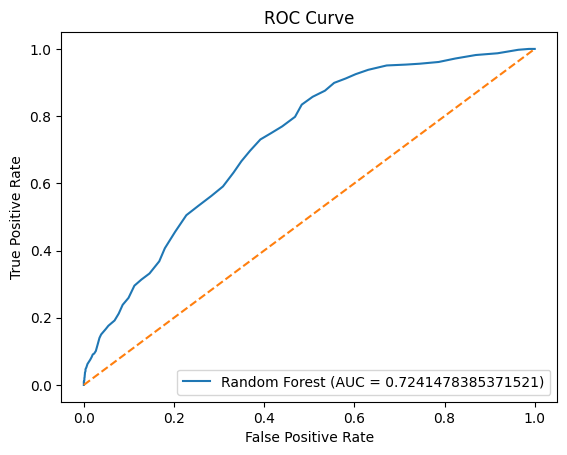

In [9]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=49)
rf_clf.fit(X_trainset, y_train)

# Predict probabilities on the original test set
y_prob_rf = rf_clf.predict_proba(X_testset)[:, 1]

# Evaluate the Random Forest Model using ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test['target'], y_prob_rf)
roc_auc_rf = sklearn.metrics.auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [10]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

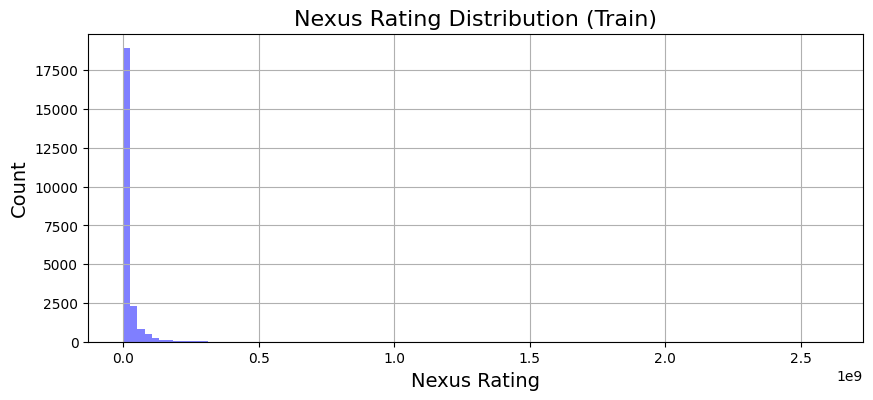

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [12]:
testDataNR = test['grid_connections']
test_shift = test.shift(axis=1)
test_shift['ownership_type'] = test_shift['nexus_rating']
test_shift['nexus_rating'] = testDataNR

test_shift.head()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,34000000.0,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0
1,NaN,8700000.0,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0
2,3.0,6177920.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0
3,NaN,8900000.0,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0
4,NaN,5550000.0,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


{'depth': 9, 'iterations': 900, 'learning_rate': 0.051}
0.2943620641291788


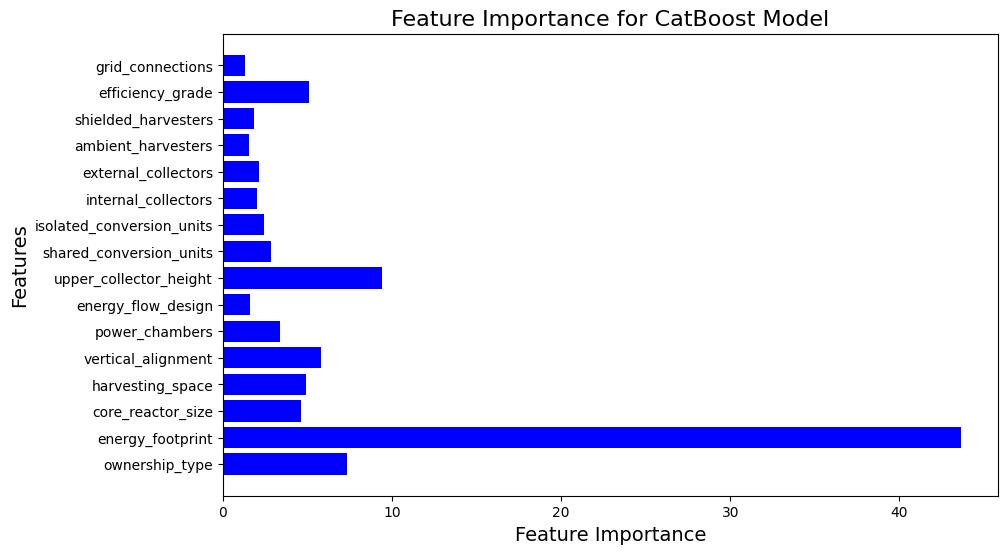

In [13]:
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))



parameters = {
    'iterations': [900],
    'learning_rate': [.051],
    'depth': [9]
}

scorer = make_scorer(rmsle, greater_is_better=False)

catBoost = CatBoostRegressor(loss_function='RMSE', verbose=False)

grid = GridSearchCV(estimator=catBoost, param_grid=parameters, cv=2, n_jobs=-1, scoring=scorer)
grid.fit(train.drop(columns=['nexus_rating']), np.log(train['nexus_rating']))
predCatBoost = grid.predict(test_shift.drop(columns=['nexus_rating']))

print(grid.best_params_)
print(rmsle(test_shift['nexus_rating'], np.exp(predCatBoost)))




feature_importance = grid.best_estimator_.get_feature_importance()
features = train.drop('nexus_rating', axis=1).columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for CatBoost Model', fontsize=16)
plt.show()






In [14]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test_shift['nexus_rating'], np.exp(predCatBoost)))
print('Required RMSLE: ', 0.294)

RMSLE:  0.2943620641291788
Required RMSLE:  0.294


#### Discussion Final Mission:
2a: The threshold breaking strategy was shifting the data in the test-dataset to match the values of the train-dataset. Then we used the CatBoost model, that handled the NaNs. The Catboost is a gradient boosting algorithm that ensemble decision trees in a sequential manner. We also used grid-search to find the best composition of the parameters. We also used log on the target (nexus_rating) to scale the values down and lower the error.

2b: RMSLE is used because taking the log of predicted value and true value, reduces the impact of large errors. It is good to use in our case, since nexus_rating has wide range of values that can have large errors. Our model takes use of "RMSE" when optimizing the catBoost model, while "RMSLE" is used when evaluating the models performance using cross-validation, on selecting hyperparameters.

2d: We use CatBoost, which ensembles decisiontrees in the form of gradient boosting. Where the next decisiontree is trained on minimizing the loss function, by reducing the errors made by prevous trees (residuals). The trees are added in a sequential way. Catboost automatically fixes samples with NaNs and categorical features.

2e: If we cannot see the targets on the test data, we must assume it follows the patterns of the training-dataset. To make sure the model would do good on the test-targets i would cross-validate the model, by checking that the models hyperparamters are nicely tuned. By monotoring the validationdata, this will help us to see if the model is overfitted or underfitted.